## Problem Set #3
MACS 30200, Dr. Evans and Dr. Soltoff

Shuting Chen

### Part 1. Image Classification

In [3]:
import random
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import regularizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Set random seed to 1234
random.seed(1234)

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images, valid_images, train_labels, valid_labels = \
    train_test_split(train_images, train_labels, test_size = 0.16666, random_state = 1234)

#### Implement a series of neural network models

In [4]:
# i. Initial test 
network_org = models.Sequential()
network_org.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(10, activation='softmax'))
network_org.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_org = network_org.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), 
                             epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.5245 - acc: 0.8371 - val_loss: 0.1734 - val_acc: 0.9460
Epoch 2/200
50000/50000 [==============================] - 8s 170us/step - loss: 0.1587 - acc: 0.9521 - val_loss: 0.1933 - val_acc: 0.9438
Epoch 3/200
50000/50000 [==============================] - 8s 169us/step - loss: 0.0999 - acc: 0.9697 - val_loss: 0.1016 - val_acc: 0.9671
Epoch 4/200
50000/50000 [==============================] - 9s 174us/step - loss: 0.0680 - acc: 0.9792 - val_loss: 0.0889 - val_acc: 0.9740
Epoch 5/200
50000/50000 [==============================] - 8s 167us/step - loss: 0.0497 - acc: 0.9844 - val_loss: 0.0785 - val_acc: 0.9768
Epoch 6/200
50000/50000 [==============================] - 8s 161us/step - loss: 0.0368 - acc: 0.9884 - val_loss: 0.0766 - val_acc: 0.9796
Epoch 7/200
50000/50000 [==============================] - 8s 162us/step - loss: 0.0281 - acc: 0.9914 - val_loss: 0.

50000/50000 [==============================] - 10s 199us/step - loss: 0.0039 - acc: 0.9991 - val_loss: 0.1700 - val_acc: 0.9804
Epoch 60/200
50000/50000 [==============================] - 10s 203us/step - loss: 0.0070 - acc: 0.9988 - val_loss: 0.1832 - val_acc: 0.9796
Epoch 61/200
50000/50000 [==============================] - 10s 201us/step - loss: 0.0086 - acc: 0.9984 - val_loss: 0.1484 - val_acc: 0.9821
Epoch 62/200
50000/50000 [==============================] - 10s 194us/step - loss: 0.0049 - acc: 0.9992 - val_loss: 0.1589 - val_acc: 0.9834
Epoch 63/200
50000/50000 [==============================] - 10s 202us/step - loss: 0.0071 - acc: 0.9990 - val_loss: 0.2430 - val_acc: 0.9754
Epoch 64/200
50000/50000 [==============================] - 11s 211us/step - loss: 0.0065 - acc: 0.9989 - val_loss: 0.1859 - val_acc: 0.9804
Epoch 65/200
50000/50000 [==============================] - 9s 190us/step - loss: 0.0054 - acc: 0.9991 - val_loss: 0.1790 - val_acc: 0.9814
Epoch 66/200
50000/50000 [=

Epoch 175/200
50000/50000 [==============================] - 8s 160us/step - loss: 0.0030 - acc: 0.9995 - val_loss: 0.1986 - val_acc: 0.9830
Epoch 176/200
50000/50000 [==============================] - 8s 161us/step - loss: 0.0036 - acc: 0.9995 - val_loss: 0.1869 - val_acc: 0.9829
Epoch 177/200
50000/50000 [==============================] - 8s 161us/step - loss: 0.0048 - acc: 0.9994 - val_loss: 0.1651 - val_acc: 0.9851
Epoch 178/200
50000/50000 [==============================] - 8s 158us/step - loss: 0.0030 - acc: 0.9997 - val_loss: 0.1640 - val_acc: 0.9855
Epoch 179/200
50000/50000 [==============================] - 8s 164us/step - loss: 0.0055 - acc: 0.9993 - val_loss: 0.2307 - val_acc: 0.9805
Epoch 180/200
50000/50000 [==============================] - 8s 165us/step - loss: 0.0098 - acc: 0.9990 - val_loss: 0.1963 - val_acc: 0.9824
Epoch 181/200
50000/50000 [==============================] - 8s 160us/step - loss: 0.0053 - acc: 0.9994 - val_loss: 0.1993 - val_acc: 0.9829
Epoch 182/200

In [5]:
network_org.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


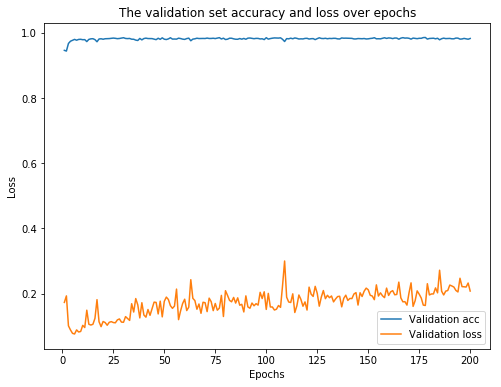

In [6]:
# Plot the validation set accuracy and loss over the epochs
val_acc = result_org.history['val_acc']
val_loss = result_org.history['val_loss']

epochs = range(1, len(val_acc) + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, val_acc, label='Validation acc')
plt.plot(epochs, val_loss, label ='Validation loss')
plt.title('The validation set accuracy and loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 0)
plt.show()

In [7]:
# Identify the epoch where the model's performance 
# degrades based on the validation set
val_loss [0:20]

[0.1733980065345764,
 0.19332772197723389,
 0.10157754739522934,
 0.08894583978652953,
 0.07851888028383255,
 0.07660322302579879,
 0.08906702135801316,
 0.08263189833164215,
 0.08431278896331787,
 0.10307373161315918,
 0.09635577325820922,
 0.1494863366365433,
 0.10637954905033112,
 0.10404318993091584,
 0.106316814494133,
 0.12445547337532044,
 0.18179842772483826,
 0.11406084418296814,
 0.09908389887809753,
 0.11484747183322906]

Since the validation set loss achieves its lowest value around sixth epoch, I choose the sixth epoch as the degrading point. 

In [8]:
# ii. Implement dropout
dropout = models.Sequential()
dropout.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
dropout.add(layers.Dropout(0.5))
dropout.add(layers.Dense(512, activation='relu'))
dropout.add(layers.Dropout(0.5))
dropout.add(layers.Dense(512, activation='relu'))
dropout.add(layers.Dropout(0.5))
dropout.add(layers.Dense(512, activation='relu'))
dropout.add(layers.Dropout(0.5))
dropout.add(layers.Dense(10, activation='softmax'))
dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_dropout = dropout.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), 
                             epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 10s 206us/step - loss: 0.7228 - acc: 0.7618 - val_loss: 0.2538 - val_acc: 0.9233
Epoch 2/200
50000/50000 [==============================] - 10s 205us/step - loss: 0.2592 - acc: 0.9243 - val_loss: 0.1759 - val_acc: 0.9471
Epoch 3/200
50000/50000 [==============================] - 11s 213us/step - loss: 0.1999 - acc: 0.9436 - val_loss: 0.1291 - val_acc: 0.9622
Epoch 4/200
50000/50000 [==============================] - 9s 184us/step - loss: 0.1655 - acc: 0.9537 - val_loss: 0.1151 - val_acc: 0.9677
Epoch 5/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.1427 - acc: 0.9602 - val_loss: 0.0979 - val_acc: 0.9709
Epoch 6/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.1257 - acc: 0.9655 - val_loss: 0.0975 - val_acc: 0.9719
Epoch 7/200
50000/50000 [==============================] - 9s 181us/step - loss: 0.1162 - acc: 0.9676 - val_loss:

50000/50000 [==============================] - 12s 232us/step - loss: 0.0524 - acc: 0.9892 - val_loss: 0.0870 - val_acc: 0.9817
Epoch 60/200
50000/50000 [==============================] - 10s 192us/step - loss: 0.0522 - acc: 0.9899 - val_loss: 0.0881 - val_acc: 0.9828
Epoch 61/200
50000/50000 [==============================] - 9s 188us/step - loss: 0.0505 - acc: 0.9899 - val_loss: 0.0848 - val_acc: 0.9832
Epoch 62/200
50000/50000 [==============================] - 10s 204us/step - loss: 0.0533 - acc: 0.9897 - val_loss: 0.0811 - val_acc: 0.9840
Epoch 63/200
50000/50000 [==============================] - 10s 201us/step - loss: 0.0507 - acc: 0.9897 - val_loss: 0.0927 - val_acc: 0.9835
Epoch 64/200
50000/50000 [==============================] - 10s 194us/step - loss: 0.0464 - acc: 0.9909 - val_loss: 0.0929 - val_acc: 0.9816
Epoch 65/200
50000/50000 [==============================] - 9s 189us/step - loss: 0.0527 - acc: 0.9900 - val_loss: 0.0893 - val_acc: 0.9824
Epoch 66/200
50000/50000 [==

50000/50000 [==============================] - 9s 189us/step - loss: 0.0711 - acc: 0.9920 - val_loss: 0.1605 - val_acc: 0.9832
Epoch 176/200
50000/50000 [==============================] - 9s 187us/step - loss: 0.0722 - acc: 0.9918 - val_loss: 0.1433 - val_acc: 0.9844
Epoch 177/200
50000/50000 [==============================] - 9s 179us/step - loss: 0.0787 - acc: 0.9912 - val_loss: 0.1475 - val_acc: 0.9829
Epoch 178/200
50000/50000 [==============================] - 9s 181us/step - loss: 0.0718 - acc: 0.9920 - val_loss: 0.1647 - val_acc: 0.9835
Epoch 179/200
50000/50000 [==============================] - 9s 181us/step - loss: 0.0734 - acc: 0.9919 - val_loss: 0.1619 - val_acc: 0.9833
Epoch 180/200
50000/50000 [==============================] - 9s 176us/step - loss: 0.0727 - acc: 0.9914 - val_loss: 0.1655 - val_acc: 0.9832
Epoch 181/200
50000/50000 [==============================] - 9s 180us/step - loss: 0.0775 - acc: 0.9919 - val_loss: 0.1597 - val_acc: 0.9843
Epoch 182/200
50000/50000 [

In [9]:
dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
__________

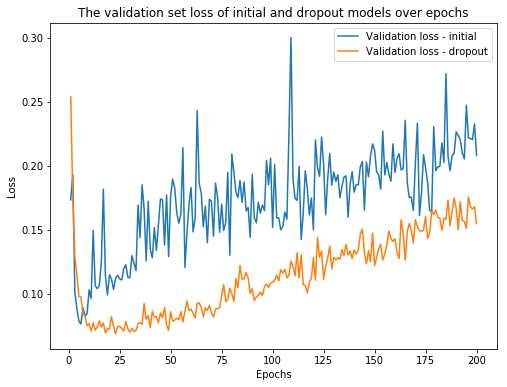

In [10]:
# Plot for validation loss across epochs between the dropout model and 
# the initial model 
val_loss_org = result_org.history['val_loss']
val_loss_dropout = result_dropout.history['val_loss']

epochs = range(1, len(val_loss_org) + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, val_loss_org, label='Validation loss - initial')
plt.plot(epochs, val_loss_dropout, label ='Validation loss - dropout')
plt.title('The validation set loss of initial and dropout models over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 0)
plt.show()

The dropout model performs better than the initial model in most epochs, with the lowest validation loss. 

In [11]:
# iii. Weight regularization 
# L1 weight regularization 
network_wr1 = models.Sequential()
network_wr1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), 
                            kernel_regularizer=regularizers.l1(0.001)))
network_wr1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_wr1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_wr1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_wr1.add(layers.Dense(10, activation='softmax'))
network_wr1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_wr1 = network_wr1.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), 
                             epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 22s 435us/step - loss: 13.6062 - acc: 0.6597 - val_loss: 4.0627 - val_acc: 0.7558
Epoch 2/200
50000/50000 [==============================] - 21s 418us/step - loss: 3.0461 - acc: 0.7895 - val_loss: 2.3708 - val_acc: 0.8599
Epoch 3/200
50000/50000 [==============================] - 20s 391us/step - loss: 2.2045 - acc: 0.8319 - val_loss: 2.0128 - val_acc: 0.8457
Epoch 4/200
50000/50000 [==============================] - 19s 374us/step - loss: 1.8957 - acc: 0.8523 - val_loss: 1.8128 - val_acc: 0.8538
Epoch 5/200
50000/50000 [==============================] - 19s 379us/step - loss: 1.7177 - acc: 0.8702 - val_loss: 1.6010 - val_acc: 0.8945
Epoch 6/200
50000/50000 [==============================] - 19s 377us/step - loss: 1.5903 - acc: 0.8819 - val_loss: 1.5181 - val_acc: 0.8939
Epoch 7/200
50000/50000 [==============================] - 19s 382us/step - loss: 1.4970 - acc: 0.8916 - val_

Epoch 59/200
50000/50000 [==============================] - 16s 311us/step - loss: 0.9444 - acc: 0.9569 - val_loss: 0.9538 - val_acc: 0.9555
Epoch 60/200
50000/50000 [==============================] - 15s 304us/step - loss: 0.9429 - acc: 0.9564 - val_loss: 0.9519 - val_acc: 0.9539
Epoch 61/200
50000/50000 [==============================] - 15s 303us/step - loss: 0.9406 - acc: 0.9574 - val_loss: 0.9929 - val_acc: 0.9393
Epoch 62/200
50000/50000 [==============================] - 15s 305us/step - loss: 0.9416 - acc: 0.9564 - val_loss: 0.9302 - val_acc: 0.9582
Epoch 63/200
50000/50000 [==============================] - 15s 304us/step - loss: 0.9389 - acc: 0.9570 - val_loss: 1.0088 - val_acc: 0.9365
Epoch 64/200
50000/50000 [==============================] - 15s 304us/step - loss: 0.9368 - acc: 0.9565 - val_loss: 0.9836 - val_acc: 0.9421
Epoch 65/200
50000/50000 [==============================] - 15s 306us/step - loss: 0.9361 - acc: 0.9580 - val_loss: 0.9293 - val_acc: 0.9577
Epoch 66/200


Epoch 117/200
50000/50000 [==============================] - 17s 345us/step - loss: 0.8945 - acc: 0.9611 - val_loss: 0.8988 - val_acc: 0.9599
Epoch 118/200
50000/50000 [==============================] - 17s 346us/step - loss: 0.8948 - acc: 0.9604 - val_loss: 0.9364 - val_acc: 0.9483
Epoch 119/200
50000/50000 [==============================] - 18s 350us/step - loss: 0.8927 - acc: 0.9612 - val_loss: 0.9212 - val_acc: 0.9503
Epoch 120/200
50000/50000 [==============================] - 17s 346us/step - loss: 0.8928 - acc: 0.9609 - val_loss: 0.9237 - val_acc: 0.9499
Epoch 121/200
50000/50000 [==============================] - 17s 340us/step - loss: 0.8928 - acc: 0.9611 - val_loss: 0.9016 - val_acc: 0.9572
Epoch 122/200
50000/50000 [==============================] - 17s 344us/step - loss: 0.8944 - acc: 0.9610 - val_loss: 0.9027 - val_acc: 0.9581
Epoch 123/200
50000/50000 [==============================] - 17s 347us/step - loss: 0.8920 - acc: 0.9608 - val_loss: 0.9005 - val_acc: 0.9589
Epoch 

In [12]:
# L2 weight regularization 
network_wr2 = models.Sequential()
network_wr2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), 
                            kernel_regularizer=regularizers.l2(0.001)))
network_wr2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_wr2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_wr2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_wr2.add(layers.Dense(10, activation='softmax'))
network_wr2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_wr2 = network_wr2.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), 
                             epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 23s 459us/step - loss: 1.8331 - acc: 0.8260 - val_loss: 1.1263 - val_acc: 0.9213
Epoch 2/200
50000/50000 [==============================] - 17s 332us/step - loss: 0.8562 - acc: 0.9364 - val_loss: 0.6821 - val_acc: 0.9371
Epoch 3/200
50000/50000 [==============================] - 10s 203us/step - loss: 0.5467 - acc: 0.9497 - val_loss: 0.4638 - val_acc: 0.9544
Epoch 4/200
50000/50000 [==============================] - 10s 202us/step - loss: 0.4003 - acc: 0.9608 - val_loss: 0.3335 - val_acc: 0.9694
Epoch 5/200
50000/50000 [==============================] - 11s 225us/step - loss: 0.3316 - acc: 0.9644 - val_loss: 0.3373 - val_acc: 0.9561
Epoch 6/200
50000/50000 [==============================] - 12s 243us/step - loss: 0.2865 - acc: 0.9691 - val_loss: 0.4815 - val_acc: 0.9123
Epoch 7/200
50000/50000 [==============================] - 12s 234us/step - loss: 0.2638 - acc: 0.9707 - val_l

Epoch 59/200
50000/50000 [==============================] - 10s 207us/step - loss: 0.1001 - acc: 0.9893 - val_loss: 0.1433 - val_acc: 0.9753
Epoch 60/200
50000/50000 [==============================] - 10s 206us/step - loss: 0.0964 - acc: 0.9907 - val_loss: 0.1551 - val_acc: 0.9722
Epoch 61/200
50000/50000 [==============================] - 11s 217us/step - loss: 0.0954 - acc: 0.9903 - val_loss: 0.1468 - val_acc: 0.9749
Epoch 62/200
50000/50000 [==============================] - 11s 214us/step - loss: 0.0961 - acc: 0.9906 - val_loss: 0.1348 - val_acc: 0.9782
Epoch 63/200
50000/50000 [==============================] - 11s 216us/step - loss: 0.0975 - acc: 0.9903 - val_loss: 0.1305 - val_acc: 0.9782
Epoch 64/200
50000/50000 [==============================] - 10s 208us/step - loss: 0.0918 - acc: 0.9915 - val_loss: 0.1458 - val_acc: 0.9746
Epoch 65/200
50000/50000 [==============================] - 14s 286us/step - loss: 0.0928 - acc: 0.9907 - val_loss: 0.1315 - val_acc: 0.9789
Epoch 66/200


Epoch 175/200
50000/50000 [==============================] - 12s 231us/step - loss: 0.0785 - acc: 0.9922 - val_loss: 0.1549 - val_acc: 0.9702
Epoch 176/200
50000/50000 [==============================] - 11s 226us/step - loss: 0.0775 - acc: 0.9925 - val_loss: 0.1277 - val_acc: 0.9781
Epoch 177/200
50000/50000 [==============================] - 12s 230us/step - loss: 0.0783 - acc: 0.9926 - val_loss: 0.1367 - val_acc: 0.9760
Epoch 178/200
50000/50000 [==============================] - 12s 230us/step - loss: 0.0788 - acc: 0.9917 - val_loss: 0.1241 - val_acc: 0.9779
Epoch 179/200
50000/50000 [==============================] - 12s 232us/step - loss: 0.0772 - acc: 0.9928 - val_loss: 0.1261 - val_acc: 0.9787
Epoch 180/200
50000/50000 [==============================] - 12s 232us/step - loss: 0.0774 - acc: 0.9919 - val_loss: 0.2408 - val_acc: 0.9523
Epoch 181/200
50000/50000 [==============================] - 12s 230us/step - loss: 0.0760 - acc: 0.9927 - val_loss: 0.1407 - val_acc: 0.9731
Epoch 

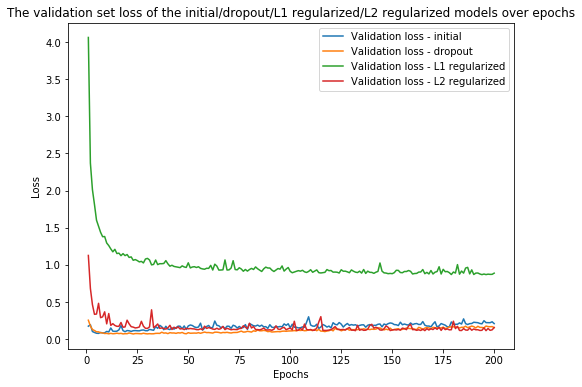

In [13]:
# Plot for validation loss across epochs for  the initial model vs. the dropout 
# vs. the L1 regularized model vs. the L2 regularized model
val_loss_org = result_org.history['val_loss']
val_loss_dropout = result_dropout.history['val_loss']
val_loss_L1 = result_wr1.history['val_loss']
val_loss_L2 = result_wr2.history['val_loss']

epochs = range(1, len(val_loss_org) + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, val_loss_org, label='Validation loss - initial')
plt.plot(epochs, val_loss_dropout, label ='Validation loss - dropout')
plt.plot(epochs, val_loss_L1, label ='Validation loss - L1 regularized')
plt.plot(epochs, val_loss_L2, label ='Validation loss - L2 regularized')
plt.title('The validation set loss of the initial/dropout/L1 regularized/L2 regularized models over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 0)
plt.show()

Based on the figure shown above, the dropout model performs the best among all these four models. 

In [14]:
# iv. Final model - best model: dropout 
best = models.Sequential()
best.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(512, activation='relu'))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(512, activation='relu'))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(512, activation='relu'))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(10, activation='softmax'))
best.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_best = best.fit(train_images, train_labels, epochs=30, batch_size=512)

Epoch 1/30
50000/50000 [==============================] - 12s 235us/step - loss: 0.7281 - acc: 0.7597
Epoch 2/30
50000/50000 [==============================] - 12s 240us/step - loss: 0.2676 - acc: 0.9225
Epoch 3/30
50000/50000 [==============================] - 11s 225us/step - loss: 0.2027 - acc: 0.9432
Epoch 4/30
50000/50000 [==============================] - 11s 225us/step - loss: 0.1679 - acc: 0.9527
Epoch 5/30
50000/50000 [==============================] - 11s 219us/step - loss: 0.1471 - acc: 0.9590
Epoch 6/30
50000/50000 [==============================] - 11s 224us/step - loss: 0.1301 - acc: 0.9629
Epoch 7/30
50000/50000 [==============================] - 12s 247us/step - loss: 0.1174 - acc: 0.9668
Epoch 8/30
50000/50000 [==============================] - 11s 227us/step - loss: 0.1065 - acc: 0.9711
Epoch 9/30
50000/50000 [==============================] - 12s 230us/step - loss: 0.0988 - acc: 0.9726
Epoch 10/30
50000/50000 [==============================] - 11s 227us/step - loss: 

In [15]:
# Calculate the test set loss and accuracy 
test_loss, test_acc = best.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 185us/step


In [16]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.09359855197393849
test_acc: 0.9832


Since the test set accuracy is a bit higher than that for the baseline in the textbook (0.9785), the dropout model performs better than the baseline mdoel in the book.  